In [1]:
import os
import glob
import rasterio
import matplotlib.pyplot as plt
import numpy as np


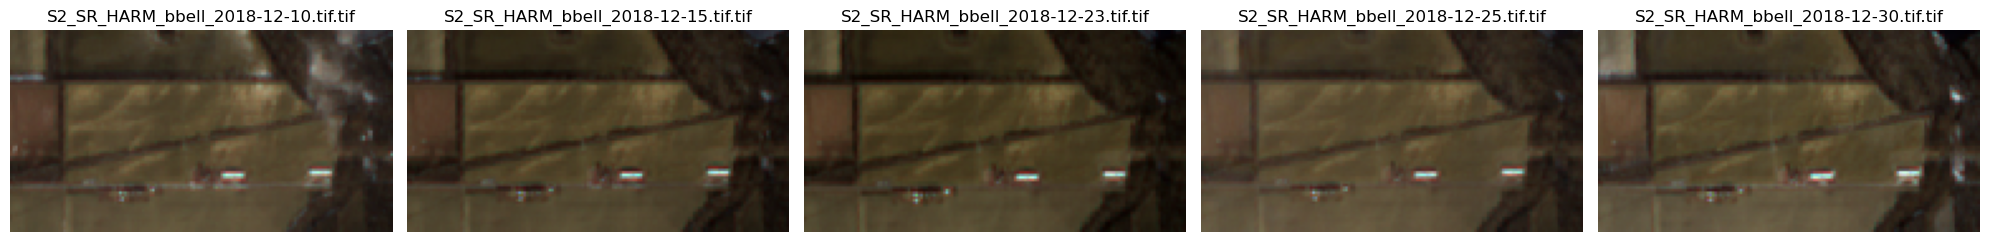

In [10]:
##LOADING AND DISPLAYING MULTIPLE TIFF FILES AS RGB COMPOSITES


def display_rgb_composite(tif_files, num_files=5):
    """
    Display the first `num_files` TIFF files as RGB composites using bands 4, 3, and 2.
    """
    fig, axes = plt.subplots(1, num_files, figsize=(20, 10))
    
    for i, tif_file in enumerate(tif_files[:num_files]):
        with rasterio.open(tif_file) as src:
            # Read the bands 4, 3, and 2
            band4 = src.read(4)
            band3 = src.read(3)
            band2 = src.read(2)
            
            # Stack the bands to create an RGB image
            rgb = np.dstack((band4, band3, band2))
            
            # Normalize the bands to the range 0-1 for display
            rgb = rgb / rgb.max()
            
            # Display the RGB composite
            ax = axes[i]
            ax.imshow(rgb)
            ax.set_title(f'{os.path.basename(tif_file)}')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Directory containing the TIFF files
tif_directory = '../../data/GEE_ANALYSIS/S2_SR_HARM_2017_2023-*/S2_SR_HARM_2017_2023'

# Get a list of all TIFF files in the directory
tif_files = glob.glob(os.path.join(tif_directory, '*.tif'))

# Display the first 5 TIFF files as RGB composites
display_rgb_composite(tif_files, num_files=5)

In [2]:
##REPROJECT IF NEDEDED

import os
import glob
import shutil
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [4]:


def create_or_recreate_folder(folder):
    if os.path.exists(folder):
        print(f"Removing existing folder: {folder}")
        shutil.rmtree(folder)
    print(f"Creating folder: {folder}")
    os.makedirs(folder)
    return folder

def reproject_tiff(input_path, output_path, target_crs="epsg:32615"):
    with rasterio.open(input_path) as src:
        if src.crs.to_string() == target_crs:
            print(f"TIFF file '{input_path}' is already in the target CRS '{target_crs}'. No reprojection needed.")
            return

        transform, width, height = calculate_default_transform(
            src.crs, target_crs, src.width, src.height, *src.bounds
        )

        meta = src.meta.copy()
        meta.update({
            'crs': target_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        print(f"TIFF file '{input_path}' is being reprojected to '{target_crs}'.")
        with rasterio.open(output_path, 'w', **meta) as dest:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dest, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=target_crs,
                    resampling=Resampling.bilinear
                )

def process_tiffs(input_directory, output_directory, target_crs="epsg:32615"):
    for root, _, files in os.walk(input_directory):
        for file in files:
            if file.endswith('.tif'):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_directory)
                output_folder_reprojected = os.path.join(output_directory, relative_path)
                os.makedirs(output_folder_reprojected, exist_ok=True)
                output_path = os.path.join(output_folder_reprojected, file)
                reproject_tiff(input_path, output_path, target_crs)

# Define input and output directories
input_directory = '../../data/GEE_ANALYSIS/'
output_directory = '../../data/GEE_ANALYSIS_UTM/'

# Create or recreate the output directory
create_or_recreate_folder(output_directory)

# Process and reproject TIFF files
process_tiffs(input_directory, output_directory, target_crs="epsg:32615")

Removing existing folder: ../../data/GEE_ANALYSIS_UTM/
Creating folder: ../../data/GEE_ANALYSIS_UTM/
TIFF file '../../data/GEE_ANALYSIS/FULL_3DEP10m_ee-20240904T181644Z-001\FULL_3DEP10m_ee\3DEP10M_bbell.tif' is being reprojected to 'epsg:32615'.
TIFF file '../../data/GEE_ANALYSIS/FULL_3DEP10m_ee-20240904T181644Z-001\FULL_3DEP10m_ee\3DEP10M_bkemp.tif' is being reprojected to 'epsg:32615'.
TIFF file '../../data/GEE_ANALYSIS/FULL_3DEP10m_ee-20240904T181644Z-001\FULL_3DEP10m_ee\3DEP10M_black.tif' is being reprojected to 'epsg:32615'.
TIFF file '../../data/GEE_ANALYSIS/FULL_3DEP10m_ee-20240904T181644Z-001\FULL_3DEP10m_ee\3DEP10M_btrust.tif' is being reprojected to 'epsg:32615'.
TIFF file '../../data/GEE_ANALYSIS/FULL_3DEP10m_ee-20240904T181644Z-001\FULL_3DEP10m_ee\3DEP10M_coder.tif' is being reprojected to 'epsg:32615'.
TIFF file '../../data/GEE_ANALYSIS/FULL_3DEP10m_ee-20240904T181644Z-001\FULL_3DEP10m_ee\3DEP10M_conley.tif' is being reprojected to 'epsg:32615'.
TIFF file '../../data/GEE_A

In [4]:
import os
import glob
import shutil
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [ ]:

##REPROJECT DATA TO UTM 31615

def create_or_recreate_folder(folder):
    if os.path.exists(folder):
        print(f"Removing existing folder: {folder}")
        shutil.rmtree(folder)
    print(f"Creating folder: {folder}")
    os.makedirs(folder)
    return folder

def reproject_tiff(input_path, output_path, target_crs="epsg:32615"):
    with rasterio.open(input_path) as src:
        if src.crs.to_string() == target_crs:
            print(f"TIFF file '{input_path}' is already in the target CRS '{target_crs}'. No reprojection needed.")
            return

        transform, width, height = calculate_default_transform(
            src.crs, target_crs, src.width, src.height, *src.bounds
        )

        meta = src.meta.copy()
        meta.update({
            'crs': target_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        print(f"TIFF file '{input_path}' is being reprojected to '{target_crs}'.")
        with rasterio.open(output_path, 'w', **meta) as dest:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dest, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=target_crs,
                    resampling=Resampling.bilinear
                )

def process_tiffs(input_directory, output_directory, target_crs="epsg:32615"):
    for root, _, files in os.walk(input_directory):
        for file in files:
            if file.endswith('.tif'):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_directory)
                output_folder_reprojected = os.path.join(output_directory, relative_path)
                os.makedirs(output_folder_reprojected, exist_ok=True)
                output_path = os.path.join(output_folder_reprojected, file)
                reproject_tiff(input_path, output_path, target_crs)

# Define input and output directories
input_directory = '../../data/GEE_ANALYSIS/'
output_directory = '../../data/GEE_ANALYSIS_UTM/'

# Create or recreate the output directory
create_or_recreate_folder(output_directory)

# Process and reproject TIFF files
process_tiffs(input_directory, output_directory, target_crs="epsg:32615")

In [ ]:
##GENERATING MASKS FOR THE IMAGES USING THE PROVIDED SHAPEFILE

import os
import rasterio
from rasterio.mask import mask
import fiona
from collections import defaultdict
from shutil import copyfile

# Function to find common patterns in shapefile names
def find_common_patterns(shp_folder):
    common_patterns = {}

    # Walk through the folder and find shapefiles
    for _, _, filenames in os.walk(shp_folder):
        for filename in filenames:
            if filename.endswith('.shp'):
                # Extract the common pattern (assuming shapefiles end with '.shp')
                common_pattern = os.path.splitext(filename)[0]
                common_patterns[common_pattern] = filename

    return common_patterns

# Function to list all tifs in the deepest subfolders
def list_tifs_in_deepest_subfolders(base_folder):
    tif_files = []

    for root, _, files in os.walk(base_folder):
        for file in files:
            if file.endswith('.tif'):
                tif_files.append(os.path.join(root, file))

    return tif_files

# Function to generate masks for the images using the provided shapefile
def generate_mask(tif_path, shapefile_path, output_path):
    with fiona.open(shapefile_path, "r") as shapefile:
        # Read all features
        features = [feature for feature in shapefile]

    # Extract the geometries from all features
    geometries = [feature['geometry'] for feature in features]

    with rasterio.open(tif_path) as src:
        # Read the image data
        img_data = src.read()

        # Copy the metadata from the source image
        out_meta = src.meta.copy()

        # Generate the mask using rasterio.mask
        masked_image, out_transform = mask(src, geometries, crop=True)

        # Update metadata with the new transform and shape
        out_meta.update({
            "height": masked_image.shape[1],
            "width": masked_image.shape[2],
            "transform": out_transform
        })

        # Save the masked image to the specified output path
        with rasterio.open(output_path, "w", **out_meta) as dest:
            dest.write(masked_image)

        print(f" - Masked and saved: {output_path}")

# Define input and output directories
input_directory = '../../data/GEE_ANALYSIS_UTM/'
output_directory = '../../data/GEE_ANALYSIS_MASKED/'
shp_folder = '../../data/input_shps_utm1/'

# Create or recreate the output directory
if os.path.exists(output_directory):
    shutil.rmtree(output_directory)
os.makedirs(output_directory)

# Find common patterns in shapefile names
common_patterns = find_common_patterns(shp_folder)
print('Common patterns are:', common_patterns)

# List all tifs in the deepest subfolders
tif_files = list_tifs_in_deepest_subfolders(input_directory)

# Process each shapefile and corresponding TIFF files
for pattern, shp_filename in common_patterns.items():
    print(f"Processing files for shapefile pattern '{pattern}':")
    shp_path = os.path.join(shp_folder, shp_filename)

    for tif_path in tif_files:
        if pattern in os.path.basename(tif_path):
            relative_path = os.path.relpath(tif_path, input_directory)
            output_tif = os.path.join(output_directory, relative_path)
            os.makedirs(os.path.dirname(output_tif), exist_ok=True)
            generate_mask(tif_path, shp_path, output_tif)

print("Processing complete.")

In [ ]:
##CALCULATING NDRE AND GENERATING TEMPORAL PROFILES

import os
import numpy as np
import rasterio
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_ndre(band4, band3, epsilon=1e-10):
    """
    Calculate the NDRE (Normalized Difference Red Edge) using bands 4 and 3.
    NDRE = (Band4 - Band3) / (Band4 + Band3)
    """
    ndre = (band4 - band3) / (band4 + band3 + epsilon)
    ndre = np.round(ndre, 4)  # Round to 4 decimal places
    
    # Check for NDRE values that are exactly 0 or 1
    #if np.any(ndre != 0) or np.any(ndre != 1):
        #print("Warning: NDRE contains values that are exactly 0 or 1.")
        #print("Warning: NDRE does not contain values that are exactly 0 or 1.")
    #else: 
        
    return ndre

def convert_to_julian_date(date_str):
    """
    Convert a date string in the format 'YYYY-MM-DD' to a Julian date.
    """
    date = datetime.strptime(date_str, '%Y-%m-%d')
    julian_date = date.timetuple().tm_yday
    return julian_date

def process_tiffs(input_directory):
    """
    Process TIFF files to calculate NDRE and generate a temporal profile by year.
    """
    # Dictionary to store NDRE values by year and pattern
    ndre_data = defaultdict(lambda: defaultdict(list))

    # List all files in the input directory
    files = os.listdir(input_directory)
    
    for file in files:
        if file.endswith('.tif'):
            # Extract the fourth string and the date from the file name
            parts = file.split('_')
            if len(parts) < 5:
                continue
            pattern = parts[3]
            date_str = parts[4].split('.')[0]  # Extract date part without .tif extension
            year = date_str.split('-')[0]
            
            # Skip files for the year 2018
            if year == '2018':
                continue

            # Convert the date to a Julian date
            julian_date = convert_to_julian_date(date_str)

            # Open the TIFF file and read bands 4, 3, and 8
            tif_path = os.path.join(input_directory, file)
            with rasterio.open(tif_path) as src:
                band1 = src.read(1)#.astype(np.float32)
                band4 = src.read(5)#.astype(np.float32)
                band3 = src.read(4)#.astype(np.float32)
                band8 = src.read(8)#.astype(np.float32)
                
                # Print min, max, mean values for band3 and band4
                # print(f"File: {file}")
                # print(f"Band 3 - Min: {np.nanmin(band3)}, Max: {np.nanmax(band3)}, Mean: {np.nanmean(band3)}")
                # print(f"Band 4 - Min: {np.nanmin(band4)}, Max: {np.nanmax(band4)}, Mean: {np.nanmean(band4)}")
                # Check for NaN values in band1
                if np.isnan(band1).any():
                    print(f"Skipping file {file} due to NaN values in band1.")
                    continue
                
                # Calculate NDRE
                ndre = calculate_ndre(band4, band3)

                # Check that all arrays have the same shape
                if ndre.shape == band1.shape == band8.shape:
                    #print(f"Shape match in file {file}: NDRE shape {ndre.shape}, band1 shape {band1.shape}, band8 shape {band8.shape}")
                    # Store the NDRE value
                    ndre_data[pattern][year].append((julian_date, ndre, band1, band8))
                    #print(ndre)
                else:
                    print(f"Shape mismatch in file {file}: NDRE shape {ndre.shape}, band1 shape {band1.shape}, band8 shape {band8.shape}")

    return ndre_data



def extract_random_points(ndre, band1, band8, num_points=5):
    """
    Extract random points from the NDRE array, ensuring they are valid pixels.
    Valid pixels are those that are not NaN in NDRE, not NaN or 0 in band 1, and not 1 in band 8.
    """
    print(f'extracting random points from NDRE...')
    points = []
    rows, cols = ndre.shape
    for _ in range(num_points):
        while True:
            row = np.random.randint(0, rows)
            col = np.random.randint(0, cols)
            if not np.isnan(ndre[row, col]) and not np.isnan(band1[row, col]) and band1[row, col] != 0 and band8[row, col] != 1:
                points.append((row, col))
                break
    return points


def extract_ndre_at_points(ndre, points):
    """
    Extract NDRE values at specific points.
    """
    
    values = []
    ndre_array = np.array(ndre)  # Convert to numpy array before indexing
    for row, col in points:
        values.append(ndre_array[row, col])
    return values

def generate_temporal_profile_plots(df, output_folder_path):
    print(f'generating temporal profiles...')
    """Generate temporal profile plots for NDRE values for each pattern."""
    # Iterate through each pattern
    for pattern, group in df.groupby('pattern'):
        # Create a figure and axis
        fig, ax = plt.subplots()

        # Set fixed x-axis and y-axis ranges
        ax.set_xlim(0, 365)
        ax.set_ylim(0, 1)

        # Iterate through each year within the pattern
        for year, year_group in group.groupby('year'):
            # Group by julian_date to calculate mean and std
            stats = year_group.groupby('julian_date')['ndre_value'].agg(['mean', 'std']).reset_index()

            # Convert to numpy arrays for plotting
            julian_dates = stats['julian_date'].to_numpy()
            mean_values = stats['mean'].to_numpy()
            std_values = stats['std'].to_numpy()

            # Plot the mean values with shaded area for std
            ax.plot(julian_dates, mean_values, label=f'{year}', marker='o')
            ax.fill_between(julian_dates, mean_values - std_values, mean_values + std_values, alpha=0.2)

        # Add legend and labels
        ax.legend()
        ax.set_xlabel('Julian Date')
        ax.set_ylabel('NDRE')
        plt.title(f'Temporal Profile for {pattern}')
        plt.savefig(os.path.join(output_folder_path, f'{pattern}.png'))
        plt.close()
        
# def generate_temporal_profile_plots1(df, output_folder_path):
#     print(f'generating temporal profiles...')
#     """Generate temporal profile plots for NDRE values for each pattern."""
#     # Get unique patterns
#     patterns = df['pattern'].unique()
#     num_patterns = len(patterns)

#     # Parameters for subplots
#     max_subplots_per_figure = 9
#     num_cols = 2
#     num_rows = (max_subplots_per_figure + num_cols - 1) // num_cols  # Ceiling division

#     # Initialize figure counter
#     figure_counter = 1

#     # Iterate through patterns in chunks of max_subplots_per_figure
#     for i in range(0, num_patterns, max_subplots_per_figure):
#         # Create a new figure with subplots
#         fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
#         axes = axes.flatten()  # Flatten the 2D array of axes

#         # Get the current chunk of patterns
#         current_patterns = patterns[i:i + max_subplots_per_figure]

#         # Iterate through each pattern and corresponding subplot axis
#         for ax, pattern in zip(axes, current_patterns):
#             group = df[df['pattern'] == pattern]

#             # Set fixed x-axis and y-axis ranges
#             ax.set_xlim(0, 365)
#             ax.set_ylim(0, 1)

#             # Iterate through each year within the pattern
#             for year, year_group in group.groupby('year'):
#                 # Group by julian_date to calculate mean and std
#                 stats = year_group.groupby('julian_date')['ndre_value'].agg(['mean', 'std']).reset_index()

#                 # Convert to numpy arrays for plotting
#                 julian_dates = stats['julian_date'].to_numpy()
#                 mean_values = stats['mean'].to_numpy()
#                 std_values = stats['std'].to_numpy()

#                 # Plot the mean values with shaded area for std
#                 ax.plot(julian_dates, mean_values, label=f'{year}', marker='o')
#                 ax.fill_between(julian_dates, mean_values - std_values, mean_values + std_values, alpha=0.2)

#             # Add legend and labels
#             ax.legend()
#             ax.set_xlabel('Julian Date')
#             ax.set_ylabel('NDRE')
#             ax.set_title(f'Temporal Profile for {pattern}')

#         # Remove unused subplots
#         for j in range(len(current_patterns), len(axes)):
#             fig.delaxes(axes[j])

#         # Adjust layout and save the figure
#         plt.tight_layout()
#         plt.savefig(os.path.join(output_folder_path, f'temporal_profiles_{figure_counter}.png'))
#         plt.close()
#         figure_counter += 1


# Define input directory
input_directory = '../../data/GEE_ANALYSIS_MASKED/S2_SR_HARM_2017_2023-20240904T181120Z-001/S2_SR_HARM_2017_2023'

# Generate temporal profile plots
output_folder_path = '../../data/TEMPORAL_PROFILES_FIELDS_YEARS'
if not os.path.exists(output_folder_path):
    os.mkdir(output_folder_path)
    
# Process TIFF files to calculate NDRE and generate a temporal profile by year
ndre_data = process_tiffs(input_directory)

# Extract NDRE profiles across each group using fixed spatial points
profile_data = []
points_dict = {}

# Extract random points for the first 5 patterns only
patterns_processed = 0
for pattern, years in ndre_data.items():
    if patterns_processed >= 9:
        break
    for year, values in years.items():
        if values:
            _, ndre, band1, band8 = values[0]
            points = extract_random_points(ndre, band1, band8)
            points_dict[(pattern, year)] = points
    patterns_processed += 1

# Use the fixed points to extract NDRE values for each date for the first 5 patterns only
# Use the fixed points to extract NDRE values for each date for the first 5 patterns only
patterns_processed = 0
missing_keys = []


# Process the data
for pattern, years in ndre_data.items():
    if patterns_processed >= 9:
        break
    for year, values in years.items():
        try:
            points = points_dict[(pattern, year)]
        except KeyError:
            print(f"Skipping pattern {pattern} for year {year} due to missing points.")
            missing_keys.append((pattern, year))
            continue
        for julian_date, ndre, _, _ in values:
            ndre_values = extract_ndre_at_points(ndre, points)
            for point_num, ndre_value in enumerate(ndre_values):
                profile_data.append({
                    'pattern': pattern,
                    'year': year,
                    'julian_date': julian_date,
                    'random_point_number': point_num,
                    'ndre_value': ndre_value
                })
    patterns_processed += 1

# Convert profile data to DataFrame
df = pd.DataFrame(profile_data)
# Check for NaN values in the DataFrame
nan_counts = df.isna().sum()
print("NaN values in DataFrame:")
print(nan_counts)

# Identify rows with NaN values
nan_rows = df[df.isna().any(axis=1)]

# Print rows with NaN values
print("Rows with NaN values:")
print(nan_rows.head(100))

print(df.head(20))

generate_temporal_profile_plots(df, output_folder_path)

In [ ]:
##GENERATE CLASSIFCAITON MAPS OF STABLE-UNSTABLE AREAS

import os
import numpy as np
import rasterio
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch


def calculate_ndre(band5, band4, epsilon=1e-10):
    """
    Calculate the NDRE (Normalized Difference Red Edge) using bands 4 and 3.
    NDRE = (Band4 - Band3) / (Band4 + Band3)
    """
    ndre = (band5 - band4) / (band5 + band4 + epsilon)
    ndre = np.round(ndre, 4)  # Round to 4 decimal places
    return ndre

def calculate_gcvi(band5, band2, epsilon=1e-10):
    """
    Calculate the GCVI (Green Chlorophyll Vegetation Index) using bands 5 and 2.
    GCVI = (Band5 / Band2) - 1
    """
    gcvi = (band5 / band2 + epsilon) - 1
    gcvi = np.round(gcvi, 4)  # Round to 4 decimal places
    return gcvi

def convert_to_julian_date(date_str):
    """
    Convert a date string in the format 'YYYY-MM-DD' to a Julian date.
    """
    date = datetime.strptime(date_str, '%Y-%m-%d')
    julian_date = date.timetuple().tm_yday
    return julian_date

def save_ndre_as_tif(ndre, reference_tif_path, output_tif_path):
    """
    Save the NDRE array as a GeoTIFF file.
    """
    with rasterio.open(reference_tif_path) as src:
        profile = src.profile
        profile.update(dtype=rasterio.float32, count=1, compress='lzw')

        with rasterio.open(output_tif_path, 'w', **profile) as dst:
            dst.write(ndre.astype(rasterio.float32), 1)

def process_tiffs(input_directory, month_range):
    """
    Process TIFF files to calculate NDRE and generate a temporal profile by year.
    """
    # Dictionary to store NDRE values by year and pattern
    ndre_data = defaultdict(lambda: defaultdict(list))

    # List all files in the input directory
    files = os.listdir(input_directory)
    
    for file in files:
        if file.endswith('.tif'):
            # Extract the fourth string and the date from the file name
            parts = file.split('_')
            if len(parts) < 5:
                continue
            pattern = parts[3]
            date_str = parts[4].split('.')[0]  # Extract date part without .tif extension
            year = date_str.split('-')[0]
            month = int(date_str.split('-')[1])
            
            # Skip files outside the specified month range
            if month < month_range[0] or month > month_range[1]:
                continue

            # Skip files for the year 2018
            if year == '2018':
                continue

            # Convert the date to a Julian date
            julian_date = convert_to_julian_date(date_str)

            # Open the TIFF file and read bands 4, 3, and 8
            tif_path = os.path.join(input_directory, file)
            with rasterio.open(tif_path) as src:
                band1 = src.read(1)
                band2 = src.read(2)
                band4 = src.read(4)
                band5 = src.read(5)
                band8 = src.read(8)
                
                # Check for NaN values in band1
                if np.isnan(band1).any():
                    #print(f"Skipping file {file} due to NaN values in band1.")
                    continue
                
                # Calculate NDRE
                #ndre = calculate_ndre(band5, band4)
                ndre = calculate_gcvi(band5, band2) ##it's gcvi

                # Check that all arrays have the same shape
                if ndre.shape == band1.shape == band8.shape:
                    # Store the NDRE value
                    ndre_data[pattern][year].append((julian_date, ndre, band1, band8, tif_path))
                else:
                    print(f"Shape mismatch in file {file}: NDRE shape {ndre.shape}, band1 shape {band1.shape}, band8 shape {band8.shape}")

    return ndre_data


def normalize_array(arr):
    """
    Normalize the array to have mean 0 and standard deviation 1, handling NaN values.
    """
    if isinstance(arr, np.ma.MaskedArray):
        mean = np.nanmean(arr.data[~arr.mask])
        std = np.nanstd(arr.data[~arr.mask])
        normalized_arr = (arr - mean) / std
        return np.ma.masked_where(arr.mask, normalized_arr)
    else:
        mean = np.nanmean(arr)
        std = np.nanstd(arr)
        normalized_arr = (arr - mean) / std
        return normalized_arr


def plot_accumulated_ndre(ndre_data, output_folder_path):
    """
    Plot the accumulated NDRE TIFF files for each pattern, saving each pattern's subplots in one figure.
    """
    patterns = list(ndre_data.keys())
    
    for pattern in patterns:
        years = list(ndre_data[pattern].keys())
        num_years = len(years)
        num_figures = (num_years + 5) // 6  # Calculate the number of figures needed

        for fig_num in range(num_figures):
            fig, axes = plt.subplots(3, 2, figsize=(15, 25))
            fig.suptitle(f'Pattern: {pattern} - Figure {fig_num + 1}', fontsize=16)
            for j in range(6):
                year_index = fig_num * 6 + j
                if year_index >= num_years:
                    break
                year = years[year_index]
                data = ndre_data[pattern][year]
                accumulated_ndre = None

                for k, (julian_date, ndre, band1, band8, tif_path) in enumerate(data):
                    if accumulated_ndre is None:
                        accumulated_ndre = np.zeros_like(ndre)
                    
                    # Mask out NaN values and outer mask region
                    valid_mask = (band1 != 0) & (~np.isnan(ndre))
                    ndre_masked = np.ma.masked_where(~valid_mask, ndre)

                    # Accumulate NDRE for each pixel
                    accumulated_ndre += ndre_masked

                # Mask out 0 values
                accumulated_ndre = np.ma.masked_where(accumulated_ndre == 0, accumulated_ndre)
                #print(accumulated_ndre)

                # Normalize the accumulated NDRE
                accumulated_ndre = normalize_array(accumulated_ndre)
                #print(accumulated_ndre)

                ax = axes[j // 2, j % 2]
                ax.imshow(accumulated_ndre, cmap='RdYlGn',vmin=-1,vmax=1)
                ax.set_title(f'Year: {year}')
                ax.axis('off')

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.savefig(os.path.join(output_folder_path, f'{pattern}_accumulated_gcvi_plots_figure_{fig_num + 1}.png'))
            #plt.show()
            
from matplotlib.colors import LinearSegmentedColormap

def create_reywgr_colormap():
    """
    Create a custom colormap from Red to Yellow to Green.
    """
    colors = ['green','yellow','orange','red']
    cmap = LinearSegmentedColormap.from_list('ReYwGr', colors, N=256)
    return cmap
   
def plot_standard_deviation(std_dev_data, output_folder_path):
    """
    Plot the standard deviation TIFF files for each pattern, saving each pattern's subplots in one figure.
    Clip extreme values to focus the color scale on the more interesting range.
    """
    patterns = list(std_dev_data.keys())
    cmap = create_reywgr_colormap()
    for pattern in patterns:
        std_dev_ndre = std_dev_data[pattern]
        
        # Determine the clipping thresholds (e.g., 5th and 95th percentiles)
        lower_threshold = np.nanpercentile(std_dev_ndre, 5)
        upper_threshold = np.nanpercentile(std_dev_ndre, 95)
        
        # Clip the SD values to the specified range
        std_dev_clipped = np.clip(std_dev_ndre, lower_threshold, upper_threshold)
        
        fig, ax = plt.subplots(figsize=(10, 10))
        #cax = ax.imshow(std_dev_clipped, cmap='viridis', vmin=lower_threshold, vmax=upper_threshold)
        #cax = ax.imshow(std_dev_clipped, cmap='viridis', vmin=0, vmax=1)
        cax = ax.imshow(std_dev_clipped, cmap=cmap, vmin=0, vmax=1)
        ax.set_title(f'Standard Deviation: {pattern}')
        ax.axis('off')

        # Add colorbar
        fig.colorbar(cax, ax=ax, shrink=0.6)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(os.path.join(output_folder_path, f'{pattern}_standard_deviation.png'))
        #plt.show()
        
def plot_binary_mask(std_dev_data, output_folder_path):
    """
    Plot a binary mask based on the standard deviation, saving each pattern's subplots in one figure.
    Regions with SD > 0.2 are marked as 'unstable' and SD <= 0.2 as 'stable'.
    Mask out pixel values equal to 0 which correspond to the outer mask in the extent.
    """
    patterns = list(std_dev_data.keys())
    
    for pattern in patterns:
        std_dev_ndre = std_dev_data[pattern]
        
        # Create binary mask
        binary_mask = np.where(np.abs(std_dev_ndre) > 0.4, 1, 0)
        
        # Mask out pixel values equal to 0 (outer mask) and NaN values
        #binary_mask = np.ma.masked_where((std_dev_ndre == 0) | np.isnan(std_dev_ndre), binary_mask)
        binary_mask = np.ma.masked_where(np.isnan(std_dev_ndre), binary_mask)
        
        # Create a colormap for the binary mask
        cmap = ListedColormap(['green', 'red'])
        
        fig, ax = plt.subplots(figsize=(10, 10))
        cax = ax.imshow(binary_mask, cmap=cmap, vmin=0, vmax=1, alpha=0.7)
        ax.set_title(f'Binary Mask: {pattern}')
        ax.axis('off')

        # Add legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor='green', edgecolor='black', label='Stable (<= 0.3)'),
                           Patch(facecolor='red', edgecolor='black', label='Unstable (> 0.3)')]
        ax.legend(handles=legend_elements, loc='upper right')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(os.path.join(output_folder_path, f'{pattern}_binary_mask.png'))
        #plt.show()
        

def plot_histogram(data, title, output_path):
    """
    Plot and save a histogram of the given data.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('NDRE Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(output_path)
    plt.close()
    

def save_classification_map(classification_map, reference_tif_path, output_tif_path):
    """
    Save the classification map as a GeoTIFF file.
    """
    classification_map = np.ma.masked_where(classification_map == 0, classification_map)

    with rasterio.open(reference_tif_path) as src:
        profile = src.profile
        profile.update(dtype=rasterio.int32, count=1, compress='lzw')

        with rasterio.open(output_tif_path, 'w', **profile) as dst:
            dst.write(classification_map.astype(rasterio.int32), 1)


def plot_classification_map(classification_map, output_fig_path):
    """
    Plot the classification map and save it as a figure.
    """
    cmap = ListedColormap(['red', 'blue', 'green'])  # Colors for unstable, high NDRE, low NDRE
    plt.imshow(classification_map, cmap=cmap, vmin=1, vmax=3, alpha=0.7)
    
    # Create custom legend
    legend_patches = [
        Patch(color='red', label='Unstable'),
        Patch(color='blue', label='Stable-Low'),
        Patch(color='green', label='Stable-High')
    ]
    #plt.legend(handles=legend_patches, loc='upper right', fontsize=8)
    plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

    
    plt.title('Classification Map')
    plt.tight_layout()
    #plt.savefig(output_fig_path)
    plt.savefig(output_fig_path, bbox_inches='tight')
    plt.close()

def process_folder_by_month_range(root_folder_path, output_folder_path, month_range):
    """
    Process TIFF files in the root folder to accumulate NDRE by range of months in each year.
    """
    ndre_data = process_tiffs(root_folder_path, month_range)

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
        
    std_dev_data = {}

    for pattern, years in ndre_data.items():
        all_years_data = []  # Initialize as a list for each pattern

        for year, data in years.items():
            accumulated_ndre = None
            tif_path = None

            for julian_date, ndre, band1, band8, tif_path in data:
                if accumulated_ndre is None:
                    accumulated_ndre = np.zeros_like(ndre)
                
                # Mask out NaN values and outer mask region
                valid_mask = (band1 != 0) & (~np.isnan(ndre))
                ndre_masked = np.ma.masked_where(~valid_mask, ndre)

                # Accumulate NDRE for each pixel
                accumulated_ndre += ndre_masked
                
            # Save accumulated NDRE as GeoTIFF
            output_tif_path = os.path.join(output_folder_path, f'{pattern}_{year}_accumulated_gcvi.tif')
            save_ndre_as_tif(accumulated_ndre, tif_path, output_tif_path)
            
            # Plot and save histogram of accumulated NDRE before normalization
            # histogram_output_path = os.path.join(output_folder_path, f'{pattern}_{year}_accumulated_gcvi_histogram.png')
            # plot_histogram(accumulated_ndre, f'Accumulated GCVI Histogram: {pattern} {year}', histogram_output_path)

            # Normalize the accumulated NDRE
            accumulated_ndre = normalize_array(accumulated_ndre)
            all_years_data.append(accumulated_ndre)  # Append to the list

            # Save accumulated NDRE as GeoTIFF
            output_tif_path = os.path.join(output_folder_path, f'{pattern}_{year}_accumulated_gcvi_normalized.tif')
            save_ndre_as_tif(accumulated_ndre, tif_path, output_tif_path)

        # Convert list to NumPy array for further processing
        all_years_data = np.array(all_years_data)
        
        # Calculate the standard deviation across all years for the current pattern
        std_dev_ndre = np.std(all_years_data, axis=0)
        std_dev_data[pattern] = std_dev_ndre

        # Save the standard deviation as GeoTIFF
        output_tif_path = os.path.join(output_folder_path, f'{pattern}_accumulated_gcvi_normalized_sd.tif')
        save_ndre_as_tif(std_dev_ndre, tif_path, output_tif_path)

        # Calculate the whole accumulated NDRE across years
        whole_accumulated_ndre = np.sum(all_years_data, axis=0)

        # Generate binary mask based on standard deviation
        binary_mask = np.where(np.abs(std_dev_ndre) > 0.4, 1, 0)
        
        binary_mask = np.ma.masked_where(np.isnan(std_dev_ndre), binary_mask)

        # Apply the binary mask to determine stable regions
        stable_region = whole_accumulated_ndre[binary_mask == 0]

        # Determine the threshold for high and low accumulated NDRE within stable regions
        threshold = np.median(stable_region)
        #print(f"Threshold for pattern {pattern}: {threshold}")

        # Create a new classification map
        classification_map = np.zeros_like(binary_mask, dtype=np.int32)

        # Mark unstable regions
        classification_map[binary_mask == 1] = 1  # Unstable

        # Mark high and low accumulated NDRE in stable regions
        
        classification_map[(binary_mask == 0) & (whole_accumulated_ndre <= threshold)] = 2  # Low NDRE
        classification_map[(binary_mask == 0) & (whole_accumulated_ndre > threshold)] = 3  # High NDRE

        # Mask out NaN values in the classification map
        classification_map = np.ma.masked_where(np.isnan(whole_accumulated_ndre), classification_map)
        #print(classification_map)
        
        # Print unique values in the classification map
        unique_values = np.unique(classification_map.compressed())
        print(f"Unique values in classification map for pattern {pattern}: {unique_values}")

        # Save the classification map
        output_tif_path = os.path.join(output_folder_path, f'{pattern}_classification_map.tif')
        save_classification_map(classification_map, tif_path, output_tif_path)

        # Save the classification map as a figure
        output_fig_path = os.path.join(output_folder_path, f'{pattern}_classification_map.png')
        plot_classification_map(classification_map, output_fig_path)

    # Plot the accumulated NDRE TIFF files for each pattern
    plot_accumulated_ndre(ndre_data, output_folder_path)
    
    # Plot the standard deviation TIFF files for each pattern
    plot_standard_deviation(std_dev_data, output_folder_path)
    
    # Plot the binary mask based on the standard deviation
    plot_binary_mask(std_dev_data, output_folder_path)

# Define input directory
root_folder_path = '../../data/GEE_ANALYSIS_MASKED/S2_SR_HARM_2017_2023-20240904T181120Z-001/S2_SR_HARM_2017_2023'

# Generate temporal profile plots
output_folder_path = '../../data/GEE_ANALYSIS_CUMULATED_GCVI1'
if not os.path.exists(output_folder_path):
    os.mkdir(output_folder_path)

month_range = (4, 10)  # Example range: April to Oct
process_folder_by_month_range(root_folder_path, output_folder_path, month_range)




In [ ]:
import os
import numpy as np
import rasterio
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import pandas as pd

from scipy.signal import savgol_filter

def calculate_ndre(band5, band4, epsilon=1e-10):
    ndre = (band5 - band4) / (band5 + band4 + epsilon)
    ndre = np.round(ndre, 4)
    return ndre

def calculate_gcvi(band5, band2, epsilon=1e-10):
    gcvi = (band5 / band2 + epsilon) - 1
    gcvi = np.round(gcvi, 4)
    return gcvi

def convert_to_julian_date(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    julian_date = date.timetuple().tm_yday
    return julian_date

def save_ndre_as_tif(ndre, reference_tif_path, output_tif_path):
    with rasterio.open(reference_tif_path) as src:
        profile = src.profile
        profile.update(dtype=rasterio.float32, count=1, compress='lzw')
        with rasterio.open(output_tif_path, 'w', **profile) as dst:
            dst.write(ndre.astype(rasterio.float32), 1)

def process_tiffs(input_directory, month_range):
    ndre_data = defaultdict(lambda: defaultdict(list))
    files = os.listdir(input_directory)
    for file in files:
        if file.endswith('.tif'):
            parts = file.split('_')
            if len(parts) < 5:
                continue
            pattern = parts[3]
            date_str = parts[4].split('.')[0]
            year = date_str.split('-')[0]
            month = int(date_str.split('-')[1])
            if month < month_range[0] or month > month_range[1]:
                continue
            if year == '2018':
                continue
            julian_date = convert_to_julian_date(date_str)
            tif_path = os.path.join(input_directory, file)
            with rasterio.open(tif_path) as src:
                band1 = src.read(1)
                band2 = src.read(2)
                band4 = src.read(4)
                band5 = src.read(5)
                band8 = src.read(8)
                if np.isnan(band1).any():
                    continue
                ndre = calculate_gcvi(band5, band2)
                if ndre.shape == band1.shape == band8.shape:
                    ndre_data[pattern][year].append((julian_date, ndre, band1, band8, tif_path))
                else:
                    print(f"Shape mismatch in file {file}: NDRE shape {ndre.shape}, band1 shape {band1.shape}, band8 shape {band8.shape}")
    return ndre_data

def normalize_array(arr):
    if isinstance(arr, np.ma.MaskedArray):
        mean = np.nanmean(arr.data[~arr.mask])
        std = np.nanstd(arr.data[~arr.mask])
        normalized_arr = (arr - mean) / std
        return np.ma.masked_where(arr.mask, normalized_arr)
    else:
        mean = np.nanmean(arr)
        std = np.nanstd(arr)
        normalized_arr = (arr - mean) / std
        return normalized_arr

def plot_accumulated_ndre(ndre_data, output_folder_path):
    patterns = list(ndre_data.keys())
    for pattern in patterns:
        years = list(ndre_data[pattern].keys())
        num_years = len(years)
        num_figures = (num_years + 5) // 6
        for fig_num in range(num_figures):
            fig, axes = plt.subplots(3, 2, figsize=(15, 25))
            fig.suptitle(f'Pattern: {pattern} - Figure {fig_num + 1}', fontsize=16)
            for j in range(6):
                year_index = fig_num * 6 + j
                if year_index >= num_years:
                    break
                year = years[year_index]
                data = ndre_data[pattern][year]
                accumulated_ndre = None
                for k, (julian_date, ndre, band1, band8, tif_path) in enumerate(data):
                    if accumulated_ndre is None:
                        accumulated_ndre = np.zeros_like(ndre)
                    valid_mask = (band1 != 0) & (~np.isnan(ndre))
                    ndre_masked = np.ma.masked_where(~valid_mask, ndre)
                    accumulated_ndre += ndre_masked
                accumulated_ndre = np.ma.masked_where(accumulated_ndre == 0, accumulated_ndre)
                accumulated_ndre = normalize_array(accumulated_ndre)
                ax = axes[j // 2, j % 2]
                ax.imshow(accumulated_ndre, cmap='RdYlGn', vmin=-1, vmax=1)
                ax.set_title(f'Year: {year}')
                ax.axis('off')
            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.savefig(os.path.join(output_folder_path, f'{pattern}_accumulated_gcvi_plots_figure_{fig_num + 1}.png'))

from matplotlib.colors import LinearSegmentedColormap
def create_reywgr_colormap():
    colors = ['green', 'yellow', 'orange', 'red']
    cmap = LinearSegmentedColormap.from_list('ReYwGr', colors, N=256)
    return cmap

def plot_standard_deviation(std_dev_data, output_folder_path):
    patterns = list(std_dev_data.keys())
    cmap = create_reywgr_colormap()
    for pattern in patterns:
        std_dev_ndre = std_dev_data[pattern]
        lower_threshold = np.nanpercentile(std_dev_ndre, 5)
        upper_threshold = np.nanpercentile(std_dev_ndre, 95)
        std_dev_clipped = np.clip(std_dev_ndre, lower_threshold, upper_threshold)
        fig, ax = plt.subplots(figsize=(10, 10))
        cax = ax.imshow(std_dev_clipped, cmap=cmap, vmin=0, vmax=1)
        ax.set_title(f'Standard Deviation: {pattern}')
        ax.axis('off')
        fig.colorbar(cax, ax=ax, shrink=0.6)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(os.path.join(output_folder_path, f'{pattern}_standard_deviation.png'))

def plot_binary_mask(std_dev_data, output_folder_path):
    patterns = list(std_dev_data.keys())
    for pattern in patterns:
        std_dev_ndre = std_dev_data[pattern]
        binary_mask = np.where(np.abs(std_dev_ndre) > 0.4, 1, 0)
        binary_mask = np.ma.masked_where(np.isnan(std_dev_ndre), binary_mask)
        cmap = ListedColormap(['green', 'red'])
        fig, ax = plt.subplots(figsize=(10, 10))
        cax = ax.imshow(binary_mask, cmap=cmap, vmin=0, vmax=1, alpha=0.7)
        ax.set_title(f'Binary Mask: {pattern}')
        ax.axis('off')
        legend_elements = [Patch(facecolor='green', edgecolor='black', label='Stable (<= 0.3)'),
                           Patch(facecolor='red', edgecolor='black', label='Unstable (> 0.3)')]
        ax.legend(handles=legend_elements, loc='upper right')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(os.path.join(output_folder_path, f'{pattern}_binary_mask.png'))

def plot_histogram(data, title, output_path):
    plt.figure(figsize=(10, 6))
    plt.hist(data.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('NDRE Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(output_path)
    plt.close()

def save_classification_map(classification_map, reference_tif_path, output_tif_path):
    classification_map = np.ma.masked_where(classification_map == 0, classification_map)
    with rasterio.open(reference_tif_path) as src:
        profile = src.profile
        profile.update(dtype=rasterio.int32, count=1, compress='lzw')
        with rasterio.open(output_tif_path, 'w', **profile) as dst:
            dst.write(classification_map.astype(rasterio.int32), 1)

def plot_classification_map(classification_map, output_fig_path):
    cmap = ListedColormap(['red', 'blue', 'green'])
    plt.imshow(classification_map, cmap=cmap, vmin=1, vmax=3, alpha=0.7)
    legend_patches = [
        Patch(color='red', label='Unstable'),
        Patch(color='blue', label='Stable-Low'),
        Patch(color='green', label='Stable-High')
    ]
    plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
    plt.title('Classification Map')
    plt.tight_layout()
    plt.savefig(output_fig_path, bbox_inches='tight')
    plt.close()

# def extract_random_points(classification_map, class_value, num_points=5):
#     rows, cols = np.where(classification_map == class_value)
#     points = list(zip(rows, cols))
#     if len(points) > num_points:
#         points = np.random.choice(len(points), num_points, replace=False)
#         points = [points[i] for i in points]
#     return points

def extract_random_points(classification_map, class_value, num_points=5):
    rows, cols = np.where(classification_map == class_value)
    points = list(zip(rows, cols))
    if len(points) > num_points:
        selected_indices = np.random.choice(len(points), num_points, replace=False)
        points = [points[i] for i in selected_indices]
    return points

def extract_gcvi_at_points(gcvi_data, points):
    values = []
    for row, col in points:
        values.append(gcvi_data[row, col])
    return values



# def generate_temporal_profile_plots(df, output_folder_path):
#     for pattern, pattern_group in df.groupby('pattern'):
#         for year, year_group in pattern_group.groupby('year'):
#             fig, ax = plt.subplots()
#             ax.set_xlim(0, 365)
#             ax.set_ylim(0, 10)
#             for class_name, class_group in year_group.groupby('class'):
#                 stats = class_group.groupby('julian_date')['gcvi_value'].agg(['mean', 'std']).reset_index()
#                 julian_dates = stats['julian_date'].to_numpy()
#                 mean_values = stats['mean'].to_numpy()
#                 std_values = stats['std'].to_numpy()
#                 ax.plot(julian_dates, mean_values, label=f'{class_name}', marker='o')
#                 ax.fill_between(julian_dates, mean_values - std_values, mean_values + std_values, alpha=0.2)
#             ax.legend()
#             ax.set_xlabel('Julian Date')
#             ax.set_ylabel('GCVI')
#             plt.title(f'Temporal Profile for {pattern} - {year}')
#             plt.savefig(os.path.join(output_folder_path, f'{pattern}_{year}_temporal_profiles.png'))
#             plt.close()

# def generate_temporal_profile_plots(df, output_folder_path):
#     for pattern, pattern_group in df.groupby('pattern'):
#         for year, year_group in pattern_group.groupby('year'):
#             fig, ax = plt.subplots()
#             ax.set_xlim(0, 365)
#             ax.set_ylim(0, 10)
#             for class_name, class_group in year_group.groupby('class'):
#                 stats = class_group.groupby('julian_date')['gcvi_value'].agg(['mean', 'std']).reset_index()
#                 julian_dates = stats['julian_date'].to_numpy()
#                 mean_values = stats['mean'].to_numpy()
#                 std_values = stats['std'].to_numpy()
                
#                 # Apply Savitzky-Golay filter to smooth the mean and standard deviation values
#                 smoothed_mean_values = savgol_filter(mean_values, window_length=15, polyorder=3)
#                 smoothed_std_values = savgol_filter(std_values, window_length=15, polyorder=3)
                
#                 cmap = ListedColormap(['red', 'blue', 'green'])
                
#                 legend_patches = [
#                     Patch(color='red', label='Unstable'),
#                     Patch(color='blue', label='Stable-Low'),
#                     Patch(color='green', label='Stable-High')
#                 ]
                
#                 ax.plot(julian_dates, smoothed_mean_values, label=f'{class_name}', marker='o')
#                 ax.fill_between(julian_dates, smoothed_mean_values - smoothed_std_values, smoothed_mean_values + smoothed_std_values, alpha=0.2)
#             ax.legend()
#             ax.set_xlabel('Julian Date')
#             ax.set_ylabel('GCVI')
#             plt.title(f'Temporal Profile for {pattern} - {year}')
#             plt.savefig(os.path.join(output_folder_path, f'{pattern}_{year}_temporal_profiles.png'))
#             plt.close()

def generate_temporal_profile_plots(df, output_folder_path):
    cmap = ListedColormap(['red', 'blue', 'green'])
    legend_patches = [
        Patch(color='red', label='Unstable'),
        Patch(color='blue', label='Stable-Low'),
        Patch(color='green', label='Stable-High')
    ]
    
    for pattern, pattern_group in df.groupby('pattern'):
        for year, year_group in pattern_group.groupby('year'):
            fig, ax = plt.subplots()
            ax.set_xlim(0, 365)
            ax.set_ylim(0, 10)
            for class_name, class_group in year_group.groupby('class'):
                stats = class_group.groupby('julian_date')['gcvi_value'].agg(['mean', 'std']).reset_index()
                julian_dates = stats['julian_date'].to_numpy()
                mean_values = stats['mean'].to_numpy()
                std_values = stats['std'].to_numpy()
                
                # Apply Savitzky-Golay filter to smooth the mean and standard deviation values
                smoothed_mean_values = savgol_filter(mean_values, window_length=15, polyorder=3)
                smoothed_std_values = savgol_filter(std_values, window_length=15, polyorder=3)
                
                # Get color from cmap based on class_name
                color = cmap.colors[list(year_group['class'].unique()).index(class_name)]
                
                ax.plot(julian_dates, smoothed_mean_values, label=f'{class_name}', marker='o', color=color)
                ax.fill_between(julian_dates, smoothed_mean_values - smoothed_std_values, smoothed_mean_values + smoothed_std_values, color=color, alpha=0.2)
            
            ax.legend(handles=legend_patches)
            ax.set_xlabel('Julian Date')
            ax.set_ylabel('GCVI')
            plt.title(f'Temporal Profile for {pattern} - {year}')
            plt.savefig(os.path.join(output_folder_path, f'{pattern}_{year}_temporal_profiles.png'))
            plt.close()

def process_folder_by_month_range(root_folder_path, output_folder_path, month_range):
    ndre_data = process_tiffs(root_folder_path, month_range)
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
    std_dev_data = {}
    for pattern, years in ndre_data.items():
        all_years_data = []
        for year, data in years.items():
            accumulated_ndre = None
            tif_path = None
            for julian_date, ndre, band1, band8, tif_path in data:
                if accumulated_ndre is None:
                    accumulated_ndre = np.zeros_like(ndre)
                valid_mask = (band1 != 0) & (~np.isnan(ndre))
                ndre_masked = np.ma.masked_where(~valid_mask, ndre)
                accumulated_ndre += ndre_masked
            output_tif_path = os.path.join(output_folder_path, f'{pattern}_{year}_accumulated_gcvi.tif')
            save_ndre_as_tif(accumulated_ndre, tif_path, output_tif_path)
            accumulated_ndre = normalize_array(accumulated_ndre)
            all_years_data.append(accumulated_ndre)
            output_tif_path = os.path.join(output_folder_path, f'{pattern}_{year}_accumulated_gcvi_normalized.tif')
            save_ndre_as_tif(accumulated_ndre, tif_path, output_tif_path)
        all_years_data = np.array(all_years_data)
        std_dev_ndre = np.std(all_years_data, axis=0)
        std_dev_data[pattern] = std_dev_ndre
        output_tif_path = os.path.join(output_folder_path, f'{pattern}_accumulated_gcvi_normalized_sd.tif')
        save_ndre_as_tif(std_dev_ndre, tif_path, output_tif_path)
        whole_accumulated_ndre = np.sum(all_years_data, axis=0)
        binary_mask = np.where(np.abs(std_dev_ndre) > 0.4, 1, 0)
        binary_mask = np.ma.masked_where(np.isnan(std_dev_ndre), binary_mask)
        stable_region = whole_accumulated_ndre[binary_mask == 0]
        threshold = np.median(stable_region)
        classification_map = np.zeros_like(binary_mask, dtype=np.int32)
        classification_map[binary_mask == 1] = 1
        classification_map[(binary_mask == 0) & (whole_accumulated_ndre <= threshold)] = 2
        classification_map[(binary_mask == 0) & (whole_accumulated_ndre > threshold)] = 3
        classification_map = np.ma.masked_where(np.isnan(whole_accumulated_ndre), classification_map)
        unique_values = np.unique(classification_map.compressed())
        print(f"Unique values in classification map for pattern {pattern}: {unique_values}")
        output_tif_path = os.path.join(output_folder_path, f'{pattern}_classification_map.tif')
        save_classification_map(classification_map, tif_path, output_tif_path)
        output_fig_path = os.path.join(output_folder_path, f'{pattern}_classification_map.png')
        plot_classification_map(classification_map, output_fig_path)
    plot_accumulated_ndre(ndre_data, output_folder_path)
    plot_standard_deviation(std_dev_data, output_folder_path)
    plot_binary_mask(std_dev_data, output_folder_path)

    # Generate temporal profiles for random points
    temporal_profiles = []
    for pattern, years in ndre_data.items():
        for year, data in years.items():
            for julian_date, ndre, band1, band8, tif_path in data:
                classification_map_path = os.path.join(output_folder_path, f'{pattern}_classification_map.tif')
                with rasterio.open(classification_map_path) as src:
                    classification_map = src.read(1)
                    classification_map = np.ma.masked_where(classification_map == 0, classification_map)
                for class_value, class_name in zip([1, 2, 3], ['Unstable', 'Stable-Low', 'Stable-High']):
                    points = extract_random_points(classification_map, class_value)
                    if points:
                        gcvi_values = extract_gcvi_at_points(ndre, points)
                        for point, gcvi_value in zip(points, gcvi_values):
                            temporal_profiles.append({
                                'pattern': pattern,
                                'year': year,
                                'julian_date': julian_date,
                                'class': class_name,
                                'point': point,
                                'gcvi_value': gcvi_value
                            })
    df = pd.DataFrame(temporal_profiles)
    generate_temporal_profile_plots(df, output_folder_path)

# Define input directory
root_folder_path = '../../data/GEE_ANALYSIS_MASKED/S2_SR_HARM_2017_2023-20240904T181120Z-001/S2_SR_HARM_2017_2023'
output_folder_path = '../../data/GEE_ANALYSIS_CUMULATED_GCVI1111'
if not os.path.exists(output_folder_path):
    os.mkdir(output_folder_path)
month_range = (1, 12)
process_folder_by_month_range(root_folder_path, output_folder_path, month_range)

In [71]:
###GENERATE TPI INDEX FROM 3DEP DATA

import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter

def calculate_tpi(dem_path, output_tpi_path, window_size=5, buffer_size=1):
    """
    Calculate the Topographic Position Index (TPI) from a DEM, excluding edge pixels and masking values greater than abs(10).
    """
    with rasterio.open(dem_path) as src:
        dem = src.read(1)
        profile = src.profile

    # Create a mask to exclude edge pixels and values greater than abs(10)
    mask = np.ones_like(dem, dtype=bool)
    mask[buffer_size:-buffer_size, buffer_size:-buffer_size] = False
    #mask[np.abs(dem) > 10] = True

    # Define a function to calculate TPI
    def tpi_func(window):
        center_value = window[len(window) // 2]
        mean_value = np.mean(window)
        return center_value - mean_value

    # Apply the TPI function using a moving window
    tpi = generic_filter(dem, tpi_func, size=window_size)

    # Apply the mask to exclude edge pixels and values greater than abs(10)
    tpi[mask] = np.nan

    # Save the TPI to a new GeoTIFF
    profile.update(dtype=rasterio.float32, count=1, compress='lzw')
    with rasterio.open(output_tpi_path, 'w', **profile) as dst:
        dst.write(tpi.astype(rasterio.float32), 1)
    
    return tpi

def classify_hillslope_positions(tpi, output_classification_path, profile):
    """
    Classify hillslope positions based on TPI.
    """
    # Define classification thresholds
    slope_positions = np.zeros_like(tpi, dtype=np.int32)
    slope_positions[tpi < -1] = 1  # Valley
    slope_positions[(tpi >= -1) & (tpi < -0.5)] = 2  # Lower slope
    slope_positions[(tpi >= -0.5) & (tpi < 0.5)] = 3  # Flat slope
    slope_positions[(tpi >= 0.5) & (tpi < 1)] = 4  # Upper slope
    slope_positions[tpi >= 1] = 5  # Ridge
    
    # Save the classification to a new GeoTIFF
    profile.update(dtype=rasterio.int32, count=1, compress='lzw')
    with rasterio.open(output_classification_path, 'w', **profile) as dst:
        dst.write(slope_positions, 1)
    
    return slope_positions

def plot_classification(classification, output_plot_path):
    """
    Plot the hillslope classification.
    """
    plt.imshow(classification, cmap='terrain')
    plt.colorbar(ticks=[1, 2, 3, 4, 5], label='Hillslope Position')
    plt.title('Hillslope Position Classification')
    plt.savefig(output_plot_path)
    plt.close()

# Define input and output directories
input_directory = '../../data/GEE_ANALYSIS_UTM/FULL_3DEP10m_ee-20240904T181644Z-001/FULL_3DEP10m_ee'
output_directory = '../../data/GEE_ANALYSIS_UTM/FULL_3DEP10m_ee-20240904T181644Z-001/FULL_3DEP10m_ee_processed'

# Create output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all TIFF files in the input directory
tif_files = [f for f in os.listdir(input_directory) if f.endswith('.tif')]

# Process each TIFF file
for tif_file in tif_files:
    dem_path = os.path.join(input_directory, tif_file)
    output_tpi_path = os.path.join(output_directory, f'{os.path.splitext(tif_file)[0]}_tpi.tif')
    output_classification_path = os.path.join(output_directory, f'{os.path.splitext(tif_file)[0]}_classification.tif')
    output_plot_path = os.path.join(output_directory, f'{os.path.splitext(tif_file)[0]}_classification.png')

    # Calculate TPI
    tpi = calculate_tpi(dem_path, output_tpi_path)

    # Classify hillslope positions
    with rasterio.open(dem_path) as src:
        profile = src.profile
    classification = classify_hillslope_positions(tpi, output_classification_path, profile)

    # Plot the classification
    plot_classification(classification, output_plot_path)

    print(f"Processed {tif_file}")

print("TPI calculation and hillslope classification complete for all files.")

Processed 3DEP10M_bbell.tif
Processed 3DEP10M_bkemp.tif
Processed 3DEP10M_black.tif
Processed 3DEP10M_btrust.tif
Processed 3DEP10M_coder.tif
Processed 3DEP10M_conley.tif
Processed 3DEP10M_conner.tif
Processed 3DEP10M_cook.tif
Processed 3DEP10M_dahlen.tif
Processed 3DEP10M_forbes.tif
Processed 3DEP10M_freddies.tif
Processed 3DEP10M_gerleman.tif
Processed 3DEP10M_goddard.tif
Processed 3DEP10M_hawkins.tif
Processed 3DEP10M_jkemp.tif
Processed 3DEP10M_kbell.tif
Processed 3DEP10M_linnco.tif
Processed 3DEP10M_lkemp.tif
Processed 3DEP10M_paxtron.tif
Processed 3DEP10M_schaapveld2019.tif
Processed 3DEP10M_schaapveld2022.tif
Processed 3DEP10M_schomberg1.tif
Processed 3DEP10M_schomberg2.tif
Processed 3DEP10M_schombergp.tif
Processed 3DEP10M_stransky.tif
Processed 3DEP10M_uimelrose.tif
TPI calculation and hillslope classification complete for all files.


In [ ]:
###EXTRACT GRIDMET DATA TO FIGURES

import os
import geopandas as gpd
import rasterio
import pandas as pd
import numpy as np
from shapely.geometry import Point, MultiPolygon
from datetime import datetime


shp_folder = '../../data/input_shps_utm1/'
tif_folder = '../../data/GEE_ANALYSIS_UTM/FULL_GRIDMET_ee-20240910T213208Z-001/FULL_GRIDMET_ee'

# Provided band names
band_short_names = ['pr', 'rmax', 'rmin', 'sph', 'srad', 'th', 'tmmn', 'tmmx', 'vs', 'erc', 'eto', 'bi', 'fm100', 'fm1000', 'etr', 'vpd']
band_long_names = ['Precipitation', 'MaxRelHumidity', 'MinRelHumidity', 'SpecificHumidity', 'SolarRadiation', 'WindDirection', 'MinTemp', 'MaxTemp', 'WindSpeed', 'EnergyReleaseComponent', 'RefEvapotranspiration', 'BurningIndex', 'FuelMoisture100', 'FuelMoisture1000', 'ActualEvapotranspiration', 'VaporPressureDeficit']

def extract_date_from_filename(filename):
    date_str = filename.split('_')[1].split('.')[0]
    return datetime.strptime(date_str, '%Y-%m-%d').date()

def get_pixel_value_at_centroid(src, geom):
    centroid = geom.centroid
    coords = [(centroid.x, centroid.y)]
    pixel_values = []
    for val in src.sample(coords):
        pixel_values.append(val)
    return pixel_values

def process_shapefiles_and_tifs(shp_folder, tif_folder):
    data = []
    for shp_file in os.listdir(shp_folder):
        if shp_file.endswith('.shp'):
            shp_path = os.path.join(shp_folder, shp_file)
            gdf = gpd.read_file(shp_path)
            for tif_file in os.listdir(tif_folder):
                if tif_file.endswith('.tif'):
                    tif_path = os.path.join(tif_folder, tif_file)
                    date = extract_date_from_filename(tif_file)
                    with rasterio.open(tif_path) as src:
                        band_names = src.descriptions
                        if not band_names or all(band_name is None for band_name in band_names):
                            band_names = band_long_names
                        print(f"Processing {tif_file} with bands: {band_names}")
                        for geom in gdf.geometry:
                            print(f"Processing geometry: {geom}")
                            pixel_values = get_pixel_value_at_centroid(src, geom)
                            if pixel_values:
                                for band_index, band_name in enumerate(band_names):
                                    print(f"Band {band_index + 1} ({band_name}) centroid pixel value: {pixel_values[0][band_index]}")
                                    data.append({
                                        'shapefile': shp_file,
                                        'date': date,
                                        'band_name': band_name,
                                        'pixel_value': pixel_values[0][band_index]
                                    })
    df = pd.DataFrame(data)
    df.to_csv('extracted_pixel_values.csv', index=False)

process_shapefiles_and_tifs(shp_folder, tif_folder)

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV file
df = pd.read_csv('extracted_pixel_values.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

print(df.head())

# Filter for precipitation and vapor pressure deficit
df_precipitation = df[df['band_name'] == 'Precipitation']
df_vpd = df[df['band_name'] == 'VaporPressureDeficit']

# Add Julian date column
df_precipitation['julian_date'] = df_precipitation['date'].dt.strftime('%j').astype(int)
df_vpd['julian_date'] = df_vpd['date'].dt.strftime('%j').astype(int)

# Create output directory for figures
output_dir = '../../data/GRIDMET_figures'
os.makedirs(output_dir, exist_ok=True)

# Function to plot temporal trajectory
def plot_temporal_trajectory(df, band_name, output_dir):
    for shp_name in df['shapefile'].unique():
        df_shp = df[df['shapefile'] == shp_name]
        plt.figure(figsize=(10, 6))
        for year in df_shp['date'].dt.year.unique():
            df_year = df_shp[df_shp['date'].dt.year == year]
            plt.plot(df_year['julian_date'].values, df_year['pixel_value'].values, label=str(year))
        plt.title(f'Temporal Trajectory of {band_name} for {shp_name}')
        plt.xlabel('Julian Date')
        plt.ylabel('Pixel Value')
        plt.legend(title='Year')
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, f'{shp_name}_{band_name}.png'))
        plt.close()

# Plot and save figures for precipitation
plot_temporal_trajectory(df_precipitation, 'Precipitation', output_dir)

# Plot and save figures for vapor pressure deficit
plot_temporal_trajectory(df_vpd, 'VaporPressureDeficit', output_dir)

# Plot and save figures for vapor pressure deficit
plot_temporal_trajectory(df_vpd, 'VaporPressureDeficit', output_dir)

   shapefile       date         band_name  pixel_value
0  bbell.shp 2015-01-01     Precipitation     0.000000
1  bbell.shp 2015-01-01    MaxRelHumidity    54.525700
2  bbell.shp 2015-01-01    MinRelHumidity    25.890291
3  bbell.shp 2015-01-01  SpecificHumidity     0.001102
4  bbell.shp 2015-01-01    SolarRadiation    92.114815


C:\Users\sebav\AppData\Local\Temp\ipykernel_5188\4134276648.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precipitation['julian_date'] = df_precipitation['date'].dt.strftime('%j').astype(int)
C:\Users\sebav\AppData\Local\Temp\ipykernel_5188\4134276648.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vpd['julian_date'] = df_vpd['date'].dt.strftime('%j').astype(int)
